In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
model = keras.models.Sequential([
    keras.Input(shape=(2,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation="softmax")
])

In [3]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
def get_class(x, y):
    class_1 = np.sqrt((1 - x) ** 2 + y ** 2) <= 1
    class_2 = np.sqrt(x ** 2 + (1 + y) ** 2) <= 1
    class_3 = np.sqrt((1 + x) ** 2 + y ** 2) <= 1
    class_4 = np.sqrt(x ** 2 + (1 - y) ** 2) <= 1

    match class_1, class_2, class_3, class_4:
        case 1, 0, 0, 0:
            return 1, 0, 0, 0, 0
        case 0, 1, 0, 0:
            return 0, 1, 0, 0, 0
        case 0, 0, 1, 0:
            return 0, 0, 1, 0, 0
        case 0, 0, 0, 1:
            return 0, 0, 0, 1, 0
        case _:
            return 0, 0, 0, 0, 1

In [6]:
n_train = 30000
X_train = 2 * (np.random.rand(n_train, 2) - 0.5)
y_train = np.empty((n_train, 5))
for i in range(len(X_train)):
    y_train[i] = get_class(X_train[i][0], X_train[i][1])

In [7]:
n_val = n_train // 5
X_val = 2 * (np.random.rand(n_val, 2) - 0.5)
y_val = np.empty((n_val, 5))
for i in range(len(X_val)):
    y_val[i] = get_class(X_val[i][0], X_val[i][1])

In [8]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_data=(X_val, y_val))

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1542 - val_loss: 0.1453
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1427 - val_loss: 0.1333
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1316 - val_loss: 0.1239
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1236 - val_loss: 0.1194
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1199 - val_loss: 0.1165
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1170 - val_loss: 0.1136
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1138 - val_loss: 0.1105
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1099 - val_loss: 0.1067
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1060 - val_loss: 0.1016
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1010 - val_loss: 0.0952
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0943 - val_loss: 0.0870
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

In [9]:
n_test = n_train // 5
X_test = 2 * (np.random.rand(n_test, 2) - 0.5)
y_test = np.empty((n_test, 5))
for i in range(len(X_test)):
    y_test[i] = get_class(X_test[i][0], X_test[i][1])

In [10]:
y_pred = model.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step


In [11]:
y_pred_norm = np.zeros_like(y_pred)
for i in range(len(y_pred_norm)):
    y_pred_norm[i, np.argmax(y_pred_norm[i])] = 1

In [12]:
true_indices = [np.argmax(label) for label in y_test]
predicted_indices = [np.argmax(label) for label in y_pred]

In [13]:
cm = confusion_matrix(true_indices, predicted_indices)

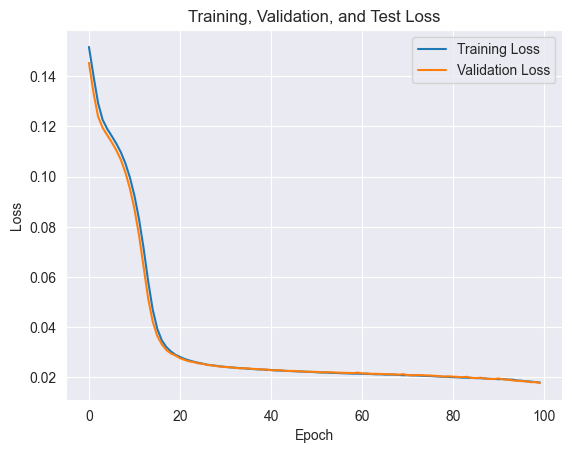

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()

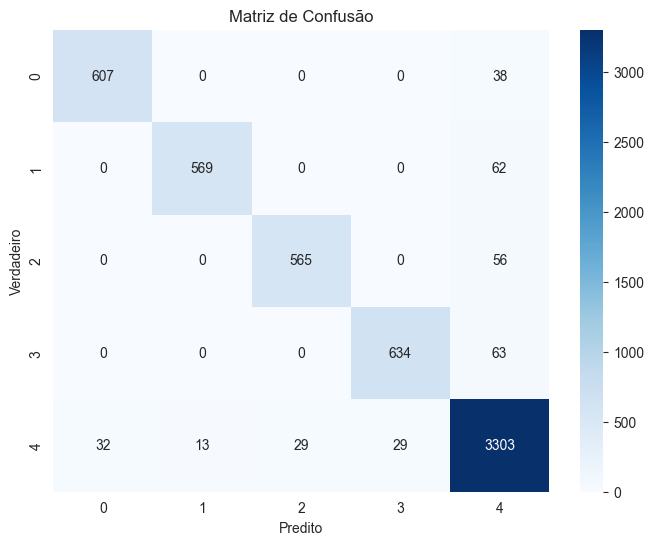

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()